# Criptografia Clásica

## Introducción

En general, cuando nos referimos a la Criptografía Clásica, hablamos de la criptografía desde la antiguedad hasta aproximadamente 1945: cuando Alan Turing quiebra Enigma, siendo este trabajo un punto de partida para la creación de la Computadora actual. 

In [9]:
# Un texto en claro:
unTextoEnClaro='Algunos algoritmos de la criptografia Clasica'
# unTextoEnClaro=input('Ingrese un texto a cifrar ')

## 1. Codificación Ascii - UTF-8

ASCII es un código que relaciona cada caracter con un número entre 32 y 126. Las mayúsculas de la "A" a la "Z" reciben números ASCII entre 65 y 90. Las minúsculas de "a" a "z" reciben los números ASCII entre 97 y 122. Los caracteres numéricos de "0" a "9" reciben números ASCII de 48 a 57. La Tabla 14-1 muestra todos los caracteres y ordinales ASCII.<br>
Las computadoras modernas usan UTF-8 en lugar de ASCII. Pero UTF-8 es compatible con ASCII, de modo que los ordinales UTF-8 para los caracteres ASCII son los mismos que los ordinales ASCII.
Ref.: https://inventwithpython.com/es/14.html

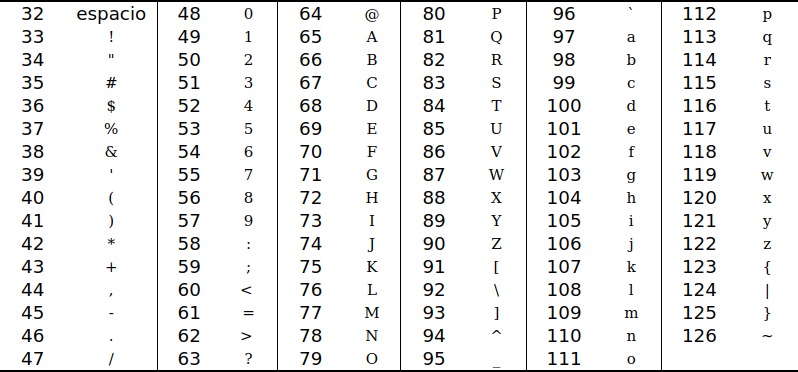

#### Ejemplos:

In [10]:
# Char (chr()):
#caracter=input('Caracter al que se le obtendrá su código Ascii: ')
caracter='K'
print('El codigo Ascii del caracter ',caracter,' es: ' ,ord(caracter))
# Ord(x):
#codigo=int(input('Código Ascii que se traducira a Caracter: '))
codigo=105
print('El caracter que le corresponde al código ASCII ',codigo,' es: ',chr(codigo))

El codigo Ascii del caracter  K  es:  75
El caracter que le corresponde al código ASCII  105  es:  i


In [11]:
print("El texto en claro: ",unTextoEnClaro)
enClaroCodificadoAscii=[]
for i in  range(len(unTextoEnClaro)):
    enClaroCodificadoAscii.append(ord(unTextoEnClaro[i]))
print("El texto codificado ASCII: ",enClaroCodificadoAscii)

El texto en claro:  Algunos algoritmos de la criptografia Clasica
El texto codificado ASCII:  [65, 108, 103, 117, 110, 111, 115, 32, 97, 108, 103, 111, 114, 105, 116, 109, 111, 115, 32, 100, 101, 32, 108, 97, 32, 99, 114, 105, 112, 116, 111, 103, 114, 97, 102, 105, 97, 32, 67, 108, 97, 115, 105, 99, 97]


## 2 Cifradores Clasicos

Se presenta aquí códigos que muestran el funcionamiento de los siguientes cifradores: Cifrador del César y Vigenere.

#### Funciones elementales:

In [12]:
# Modulo
modulo=127

In [13]:
# CifrarCesar:
# Se ingresa un caracter en claro y un caracter de Clave y se devuelve el caracter cifrado.
def cifrarCesar(enClaro,clave):
    enClaroCodigo=ord(enClaro)
    claveCodigo=ord(clave)
    cifradoCodigo=(enClaroCodigo+claveCodigo)%modulo
    cifrado=chr(cifradoCodigo)
    return cifrado

In [14]:
# DescifradoCesar:
# Se ingresa un caracter cifrado y un caracter de Clave y se devuelve el caracter descifrado.
def descifrarCesar(cifrado,clave):
    cifradoCodigo=ord(cifrado)
    claveCodigo=ord(clave)
    descifradoCodigo=(cifradoCodigo+modulo-claveCodigo)%modulo
    descifrado=chr(descifradoCodigo)
    return descifrado

In [15]:
# Probando las funciones
clave='r'
tex='x'
print('Clave: ',clave, ' orden(clave): ',ord(clave))
print('tex: ',tex, ' orden(tex): ',ord(tex))
A=cifrarCesar(tex,clave)
print("orden(",tex,"+ clave): ",(ord(tex)+ord(clave)))
print('Cifrado de tex:', A)
B=descifrarCesar(A,clave)
print('Descifrado del cifrado de tex:', B)

Clave:  r  orden(clave):  114
tex:  x  orden(tex):  120
orden( x + clave):  234
Cifrado de tex: k
Descifrado del cifrado de tex: x


### 2.1 Cifrador del Cesar

Es una de las técnicas de cifrado más simples y más usadas. Es un tipo de cifrado por sustitución en el que una letra en el texto original es reemplazada por otra letra que se encuentra un número fijo de posiciones más adelante en el alfabeto. Por ejemplo, con un desplazamiento de 3, la A sería sustituida por la D (situada 3 lugares a la derecha de la A). <br>Fuente: https://es.wikipedia.org/wiki/Cifrado_C%C3%A9sar

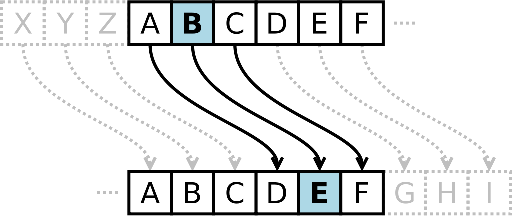

Las funciones de cifrado y descifrado se realizan para cifrar y descifrar de a pares: (caracter texto en claro ; caracter de clave). Este abordaje nos va a permitir presentar el cifrador del Cesar y Vigenere basándonos en la misma función.

In [17]:
# Ingreso de la clave:
clave=input('Ingrese la clave con la que se cifrara el texto: ')
#clave='k'
if(len(clave)>1):
    print('La clave debe ser de un caracter')

Ingrese la clave con la que se cifrara el texto: d


In [18]:
# El cifrado del texto:
textoCifrado=''
for i in range(len(unTextoEnClaro)):
    enClaro=unTextoEnClaro[i]
    textoCifrado=textoCifrado+cifrarCesar(enClaro,clave)
print(textoCifrado)

&QLZSTXFQLTWNYRTXIJQFHWNUYTLWFKNF(QFXNHF


In [19]:
# El descifrado del texto:
textoDesCifrado=''
for i in range(len(textoCifrado)):
    cifrado=textoCifrado[i]
    textoDesCifrado=textoDesCifrado+descifrarCesar(cifrado,clave)
print(textoDesCifrado)

Algunos algoritmos de la criptografia Clasica


In [20]:
print('Texto en Claro: ',unTextoEnClaro)
print('Texto cifrado: ',textoCifrado)
print('Texto descifrado: ',textoDesCifrado)

Texto en Claro:  Algunos algoritmos de la criptografia Clasica
Texto cifrado:  &QLZSTXFQLTWNYRTXIJQFHWNUYTLWFKNF(QFXNHF
Texto descifrado:  Algunos algoritmos de la criptografia Clasica


### 2.2 Cifrador de Vigenere

Es un cifrado basado en diferentes series de caracteres o letras del cifrado César. Introduce el concepto de Clave. Cada caracter de la clave se corresponde con un corrimiento en el cifrado del Cesar.

In [21]:
# Clave:
#clave=input('Ingresar su clave: ')
clave='key'

In [22]:
# El cifrado del texto:
def cifrarVigenere(texto,clave):
    textoCifrado=''
    for i in range(len(texto)):
        charTexto=texto[i]
        charClave=clave[i%len(clave)]
        textoCifrado=textoCifrado+str(cifrarCesar(charTexto,charClave))
    return textoCifrado    

In [23]:
cifra=cifrarVigenere(unTextoEnClaro,clave)

In [24]:
# El descifrado del texto cifrado:
def desCifrarVigenere(cifra,clave):
    textoDesCifrado=''
    for i in range(len(cifra)):
        charCifra=cifra[i]
        charClave=clave[i%len(clave)]
        textoDesCifrado=textoDesCifrado+descifrarCesar(charCifra,charClave)
    return textoDesCifrado        

In [25]:
descifra=desCifrarVigenere(cifra,clave)

In [26]:
# Resultados:
print('Texto en Claro: ',unTextoEnClaro)
print('Clave:          ',clave)
print('Cifrado:        ', cifra)
print('Descifrado:     ', descifra)

Texto en Claro:  Algunos algoritmos de la criptografia Clasica
Clave:           key
Cifrado:         -RaaTi_[XMi^OnYUmJ_R[IlUVn[MlMLcM=XGmUI[
Descifrado:      Algunos algoritmos de la criptografia Clasica


Existen sitios en linea que realizan el cifrado y descifrado usando Vigenere con diferentes alfabetos. Entre ellos: https://www.dcode.fr/cifrado-vigenere, https://es.planetcalc.com/2468/
